✅ All libraries imported successfully
📊 Data Loaded:
   Training samples: 436
   Test samples: 110
   Features: 13
   Target range: [40.00, 99.00]
🔧 Model Configurations:
   ✓ KNN
   ✓ DECISION_TREE
   ✓ RANDOM_FOREST
   ✓ SVR
   ✓ RIDGE
TRAINING BASE MODELS WITH 10-FOLD CROSS-VALIDATION

🔄 Training KNN...
   ✅ KNN Trained
      10-Fold CV RMSE: 18.1461 ± 6.5041
      Test RMSE: 17.7098
      Test MAE: 14.1870
      Test R²: -0.0702
      Best Params: {'n_neighbors': 9, 'weights': 'distance'}

🔄 Training DECISION_TREE...
   ✅ DECISION_TREE Trained
      10-Fold CV RMSE: 17.9550 ± 7.8615
      Test RMSE: 17.0276
      Test MAE: 14.0420
      Test R²: 0.0106
      Best Params: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

🔄 Training RANDOM_FOREST...
   ✅ RANDOM_FOREST Trained
      10-Fold CV RMSE: 17.7856 ± 7.5682
      Test RMSE: 17.5848
      Test MAE: 14.5363
      Test R²: -0.0552
      Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}

🔄 

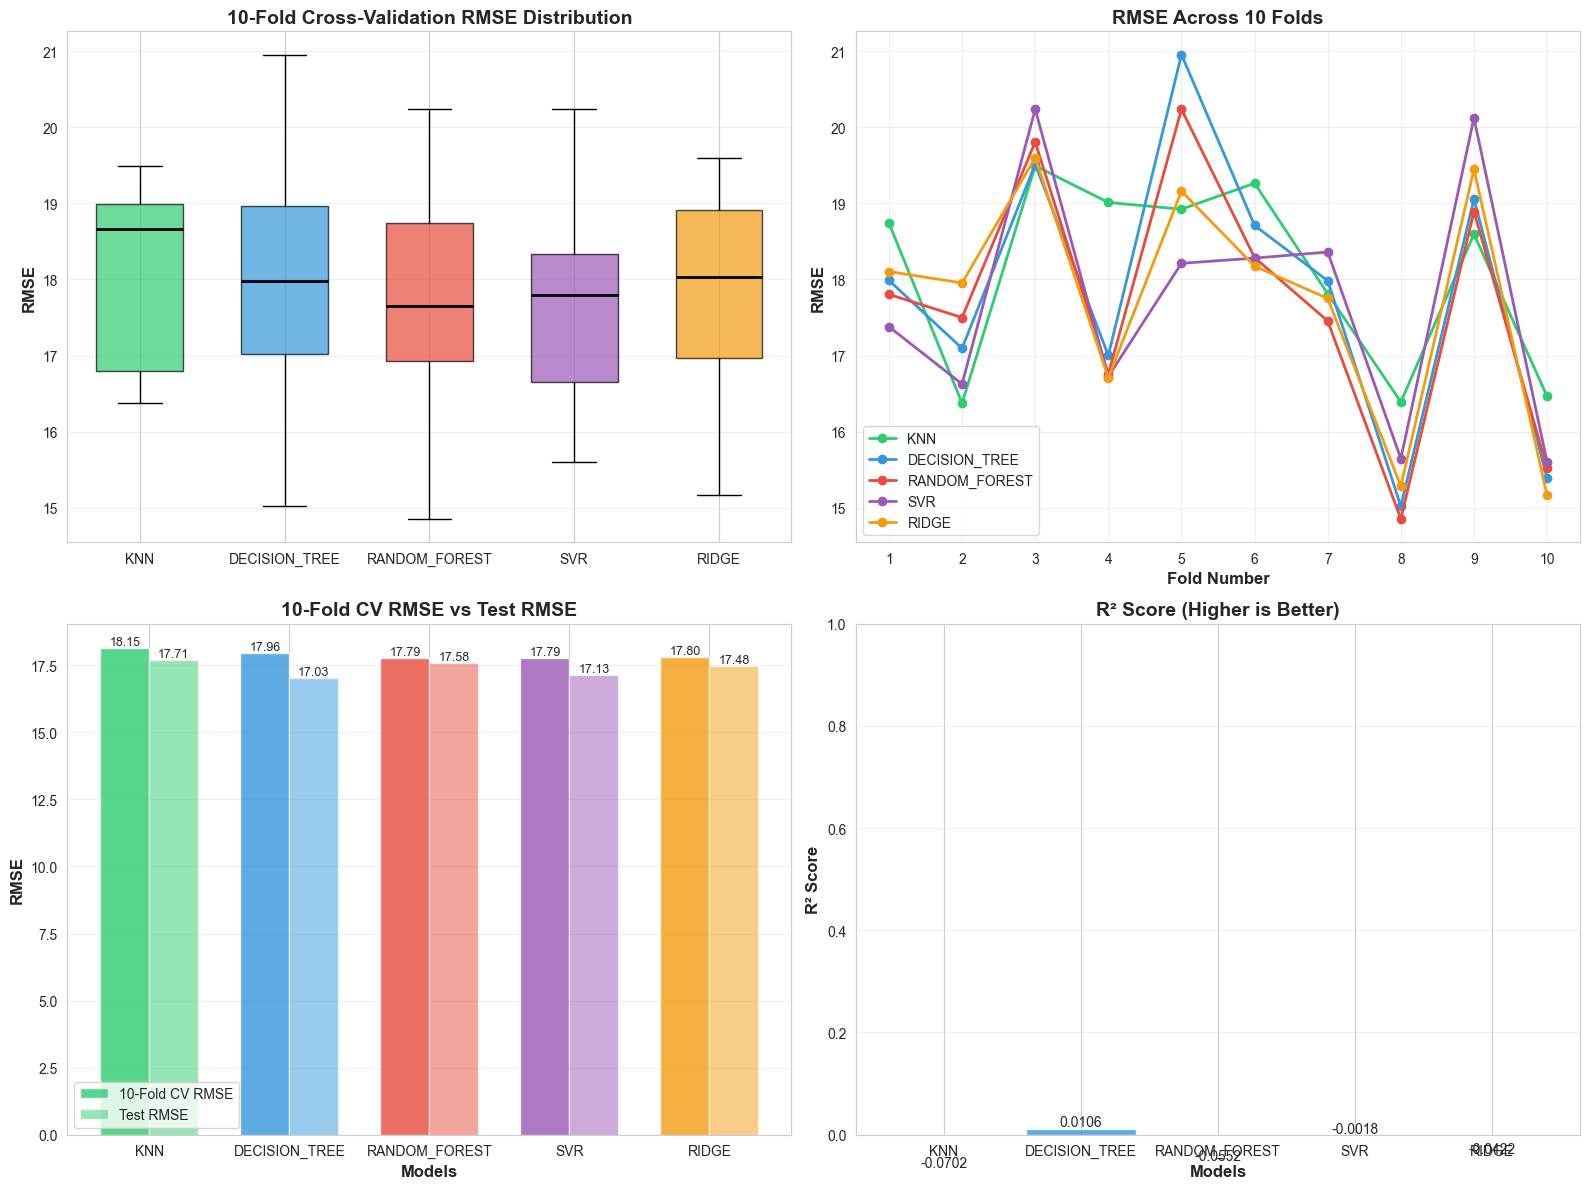


MODEL PERFORMANCE SUMMARY


,Model,CV RMSE,Test RMSE,Test MAE,Test R²
0,KNN,18.1461,17.7098,14.1870,-0.0702
1,DECISION_TREE,17.9550,17.0276,14.0420,0.0106
2,RANDOM_FOREST,17.7856,17.5848,14.5363,-0.0552
3,SVR,17.7867,17.1346,14.2113,-0.0018
4,RIDGE,17.7976,17.4768,14.8438,-0.0422



Best Model: DECISION_TREE
   Test RMSE: 17.0276
   Test R²: 0.0106

DETAILED TEST RESULTS

KNN
   Test RMSE: 17.7098
   Test MAE:  14.1870
   Test R²:   -0.0702
   10-Fold CV RMSE: 18.1461 ± 42.3039
   Mean Residual: 0.3884
   Std Residual:  17.7055

DECISION_TREE
   Test RMSE: 17.0276
   Test MAE:  14.0420
   Test R²:   0.0106
   10-Fold CV RMSE: 17.9550 ± 61.8035
   Mean Residual: 1.1192
   Std Residual:  16.9908

RANDOM_FOREST
   Test RMSE: 17.5848
   Test MAE:  14.5363
   Test R²:   -0.0552
   10-Fold CV RMSE: 17.7856 ± 57.2778
   Mean Residual: 1.2175
   Std Residual:  17.5426

SVR
   Test RMSE: 17.1346
   Test MAE:  14.2113
   Test R²:   -0.0018
   10-Fold CV RMSE: 17.7867 ± 55.7863
   Mean Residual: -0.6634
   Std Residual:  17.1217

RIDGE
   Test RMSE: 17.4768
   Test MAE:  14.8438
   Test R²:   -0.0422
   10-Fold CV RMSE: 17.7976 ± 52.0416
   Mean Residual: 1.1485
   Std Residual:  17.4391

TEST PREDICTIONS ANALYSIS

KNN
   Total Test Samples: 110
   Mean Absolute Error: 14.1

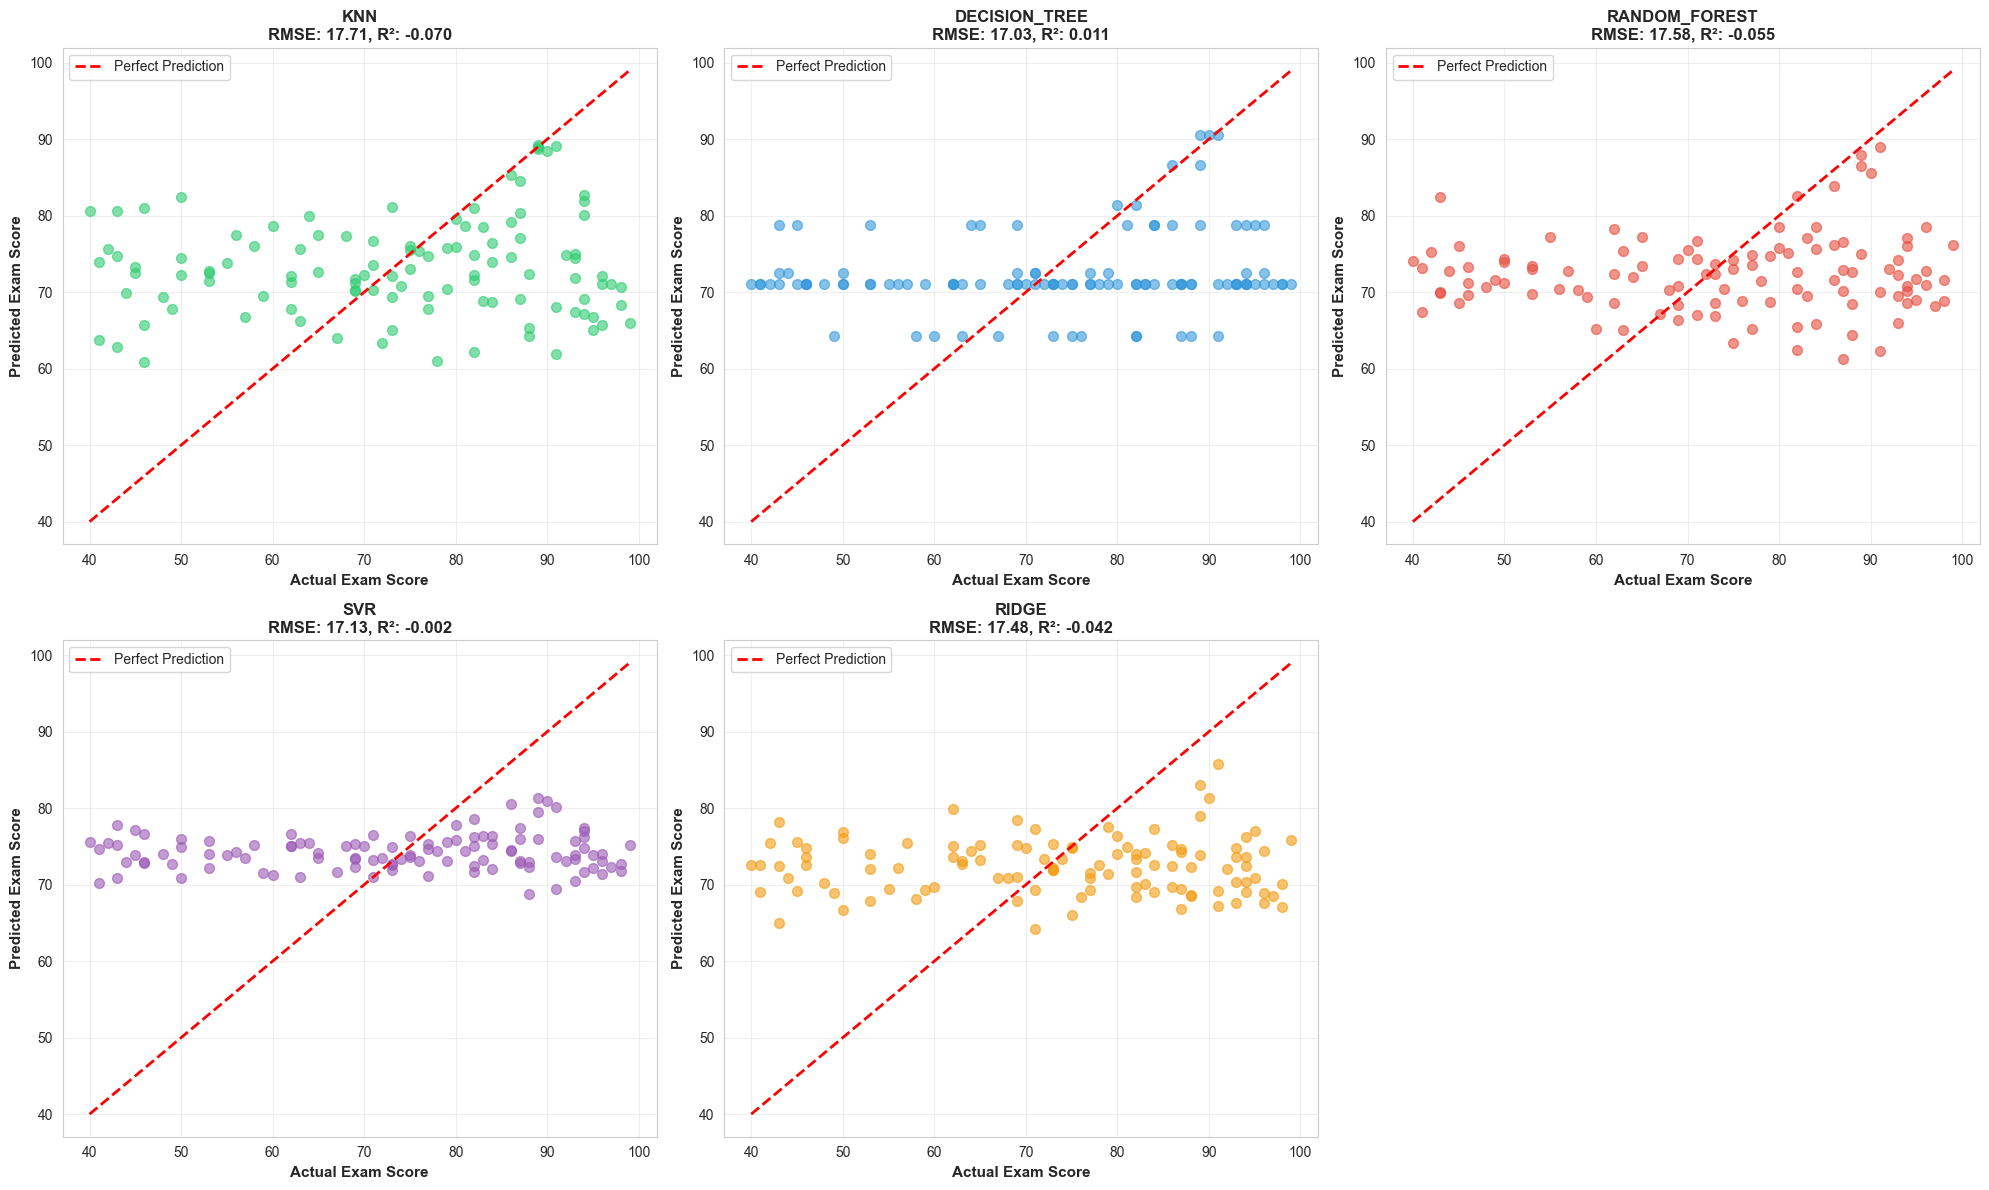

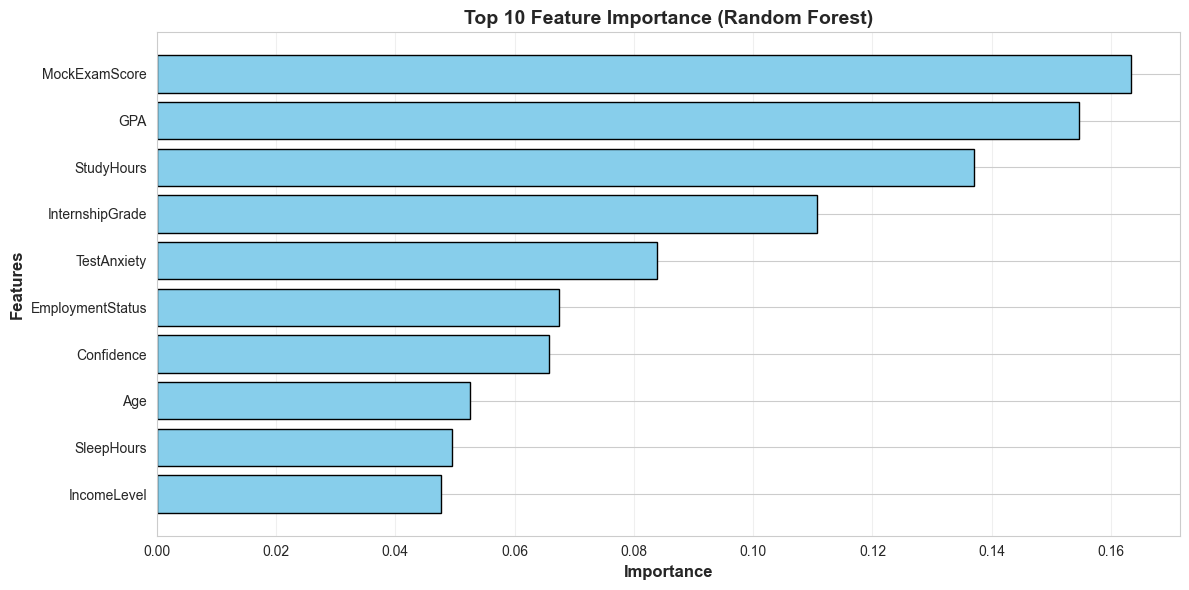


📊 Feature Importance:


,Feature,Importance
8,MockExamScore,0.163399
9,GPA,0.154597
4,StudyHours,0.137099
11,InternshipGrade,0.110754
7,TestAnxiety,0.083874
2,EmploymentStatus,0.067407
6,Confidence,0.065771
3,Age,0.052532
5,SleepHours,0.049436
1,IncomeLevel,0.047687



💾 Models saved to saved_base_models/
✅ BASE MODELS TRAINING COMPLETE!

Preprocessor saved to ../saved_base_models/


In [3]:
# Cell 1: Imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import json
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ All libraries imported successfully")

# Cell 2: Preprocessed Data
X_train = np.load('../regression_processed_data/X_train.npy')
X_test = np.load('../regression_processed_data/X_test.npy')
y_train = np.load('../regression_processed_data/y_train.npy')
y_test = np.load('../regression_processed_data/y_test.npy')

print(f"📊 Data Loaded:")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")
print(f"   Features: {X_train.shape[1]}")
print(f"   Target range: [{y_train.min():.2f}, {y_train.max():.2f}]")

# Cell 3: Define Model Configurations
model_configs = {
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10]
        }
    },
        'svr': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'epsilon': [0.01, 0.1, 0.2],
            'kernel': ['rbf']
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }
    }
}

print("🔧 Model Configurations:")
for name in model_configs.keys():
    print(f"   ✓ {name.upper()}")

# Cell 4: Train Models with 10-Fold CV
from sklearn.model_selection import KFold

results = {}
cv = KFold(n_splits=10, shuffle=True, random_state=42)

print("=" * 70)
print("TRAINING BASE MODELS WITH 10-FOLD CROSS-VALIDATION")
print("=" * 70)

for name, config in model_configs.items():
    print(f"\n🔄 Training {name.upper()}...")
    
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        return_train_score=True
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    cv_results = grid_search.cv_results_
    best_index = grid_search.best_index_
    
    fold_scores = []
    for fold_idx in range(10):
        fold_key = f'split{fold_idx}_test_score'
        fold_scores.append(-cv_results[fold_key][best_index])
    
    cv_mean = np.mean(fold_scores)
    cv_std = np.std(fold_scores)
    cv_min = np.min(fold_scores)
    cv_max = np.max(fold_scores)
    
    cv_rmse = np.sqrt(cv_mean)
    
    y_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'model': best_model,
        'cv_mse_mean': cv_mean,
        'cv_mse_std': cv_std,
        'cv_mse_min': cv_min,
        'cv_mse_max': cv_max,
        'cv_rmse': cv_rmse,
        'cv_10fold_scores': fold_scores,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'y_pred': y_pred,
        'best_params': grid_search.best_params_
    }
    
    print(f"   ✅ {name.upper()} Trained")
    print(f"      10-Fold CV RMSE: {cv_rmse:.4f} ± {np.sqrt(cv_std):.4f}")
    print(f"      Test RMSE: {test_rmse:.4f}")
    print(f"      Test MAE: {test_mae:.4f}")
    print(f"      Test R²: {test_r2:.4f}")
    print(f"      Best Params: {grid_search.best_params_}")

# Cell 5: Visualize 10-Fold CV Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

model_names = list(results.keys())
colors = ['#2ecc71', '#3498db', '#e74c3c',  '#9b59b6', '#f39c12']

# Plot 1: Box plot of 10-fold scores (RMSE)
fold_data = []
for name in model_names:
    for fold_idx, mse in enumerate(results[name]['cv_10fold_scores'], 1):
        fold_data.append({
            'Model': name.upper(),
            'Fold': fold_idx,
            'RMSE': np.sqrt(mse)
        })

fold_df = pd.DataFrame(fold_data)

box_positions = []
for idx, name in enumerate(model_names):
    model_data = fold_df[fold_df['Model'] == name.upper()]['RMSE']
    bp = axes[0, 0].boxplot([model_data], positions=[idx], widths=0.6,
                            patch_artist=True,
                            boxprops=dict(facecolor=colors[idx], alpha=0.7),
                            medianprops=dict(color='black', linewidth=2))
    box_positions.append(idx)

axes[0, 0].set_xticks(box_positions)
axes[0, 0].set_xticklabels([name.upper() for name in model_names])
axes[0, 0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 0].set_title('10-Fold Cross-Validation RMSE Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Line plot showing each fold's performance
for idx, name in enumerate(model_names):
    fold_rmse = [np.sqrt(mse) for mse in results[name]['cv_10fold_scores']]
    axes[0, 1].plot(range(1, 11), fold_rmse, marker='o', linewidth=2,
                   label=name.upper(), color=colors[idx])

axes[0, 1].set_xlabel('Fold Number', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 1].set_title('RMSE Across 10 Folds', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(range(1, 11))

# Plot 3: CV RMSE vs Test RMSE comparison
x = np.arange(len(model_names))
width = 0.35

cv_rmse_values = [results[name]['cv_rmse'] for name in model_names]
test_rmse_values = [results[name]['test_rmse'] for name in model_names]

bars1 = axes[1, 0].bar(x - width/2, cv_rmse_values, width, label='10-Fold CV RMSE',
                       color=colors, alpha=0.8)
bars2 = axes[1, 0].bar(x + width/2, test_rmse_values, width, label='Test RMSE',
                       color=colors, alpha=0.5)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom', fontsize=9)

axes[1, 0].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[1, 0].set_title('10-Fold CV RMSE vs Test RMSE', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels([name.upper() for name in model_names])
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: R² Score comparison
r2_scores = [results[name]['test_r2'] for name in model_names]

bars = axes[1, 1].bar([name.upper() for name in model_names], r2_scores,
                      color=colors, alpha=0.8)

for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=10)

axes[1, 1].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('R² Score (Higher is Better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Cell 6: Performance Summary Table
summary_data = []
for name in model_names:
    summary_data.append({
        'Model': name.upper(),
        'CV RMSE': f"{results[name]['cv_rmse']:.4f}",
        'Test RMSE': f"{results[name]['test_rmse']:.4f}",
        'Test MAE': f"{results[name]['test_mae']:.4f}",
        'Test R²': f"{results[name]['test_r2']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 70)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 70)
display(summary_df)

best_model_name = min(results.items(), key=lambda x: x[1]['test_rmse'])[0]
print(f"\nBest Model: {best_model_name.upper()}")
print(f"   Test RMSE: {results[best_model_name]['test_rmse']:.4f}")
print(f"   Test R²: {results[best_model_name]['test_r2']:.4f}")

print("\n" + "=" * 70)
print("DETAILED TEST RESULTS")
print("=" * 70)

for name in model_names:
    y_pred = results[name]['y_pred']
    rmse = results[name]['test_rmse']
    mae = results[name]['test_mae']
    r2 = results[name]['test_r2']
    
    print(f"\n{name.upper()}")
    print(f"   Test RMSE: {rmse:.4f}")
    print(f"   Test MAE:  {mae:.4f}")
    print(f"   Test R²:   {r2:.4f}")
    print(f"   10-Fold CV RMSE: {results[name]['cv_rmse']:.4f} ± {results[name]['cv_mse_std']:.4f}")
    
    residuals = y_test - y_pred
    print(f"   Mean Residual: {np.mean(residuals):.4f}")
    print(f"   Std Residual:  {np.std(residuals):.4f}")

# Cell 6.5: Detailed Test Predictions Analysis
print("\n" + "=" * 70)
print("TEST PREDICTIONS ANALYSIS")
print("=" * 70)

for name in model_names:
    y_pred = results[name]['y_pred']
    
    prediction_details = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'Error': y_test - y_pred,
        'Absolute_Error': np.abs(y_test - y_pred),
        'Percent_Error': np.abs((y_test - y_pred) / y_test) * 100
    })
    
    print(f"\n{name.upper()}")
    print(f"   Total Test Samples: {len(y_test)}")
    print(f"   Mean Absolute Error: {prediction_details['Absolute_Error'].mean():.4f}")
    print(f"   Median Absolute Error: {prediction_details['Absolute_Error'].median():.4f}")
    print(f"   Max Error: {prediction_details['Absolute_Error'].max():.4f}")
    print(f"   Min Error: {prediction_details['Absolute_Error'].min():.4f}")
    
    print(f"\n   First 10 predictions:")
    print(prediction_details.head(10).to_string(index=False))
    
    csv_file = f'../saved_base_models/{name}_test_predictions.csv'
    prediction_details.to_csv(csv_file, index=False)
    print(f"\n   Saved detailed predictions: {csv_file}")

# Cell 7: Prediction vs Actual Plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, name in enumerate(model_names):
    y_pred = results[name]['y_pred']
    
    # Scatter plot
    axes[idx].scatter(y_test, y_pred, alpha=0.6, s=50, color=colors[idx])
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 
                   'r--', linewidth=2, label='Perfect Prediction')
    
    # Metrics
    rmse = results[name]['test_rmse']
    r2 = results[name]['test_r2']
    
    axes[idx].set_xlabel('Actual Exam Score', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Predicted Exam Score', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name.upper()}\nRMSE: {rmse:.2f}, R²: {r2:.3f}',
                       fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

axes[5].axis('off')

plt.tight_layout()
plt.show()

# Cell 8: Feature Importance (Random Forest)
if 'random_forest' in results:
    feature_names = json.load(open('../regression_processed_data/feature_names.json'))
    
    rf_model = results['random_forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.barh(feature_importance['Feature'][:10], 
             feature_importance['Importance'][:10],
             color='skyblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Features', fontsize=12, fontweight='bold')
    plt.title('Top 10 Feature Importance (Random Forest)', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Feature Importance:")
    display(feature_importance)

# Cell 9: Save Models
os.makedirs('../saved_base_models', exist_ok=True)

for name, data in results.items():
    joblib.dump(data['model'], f'../saved_base_models/{name}_model.pkl')

print("\n💾 Models saved to saved_base_models/")
print("✅ BASE MODELS TRAINING COMPLETE!")

# Cell 10: Create and Save Preprocessor for Django
import joblib
import os

models_path = os.path.abspath('..')
if models_path not in sys.path:
    sys.path.insert(0, models_path)

# Import from the correct module path
from regression_preprocessor import RegressionPreprocessor

label_encoders = joblib.load('../regression_processed_data/label_encoders.pkl')
imputer = joblib.load('../regression_processed_data/imputer.pkl')
scaler = joblib.load('../regression_processed_data/scaler.pkl')
feature_names = json.load(open('../regression_processed_data/feature_names.json'))

preprocessor = RegressionPreprocessor(imputer, label_encoders, scaler)

joblib.dump(preprocessor, '../saved_base_models/preprocessor.pkl')
joblib.dump(feature_names, '../saved_base_models/feature_names.pkl')

print("\nPreprocessor saved to ../saved_base_models/")
